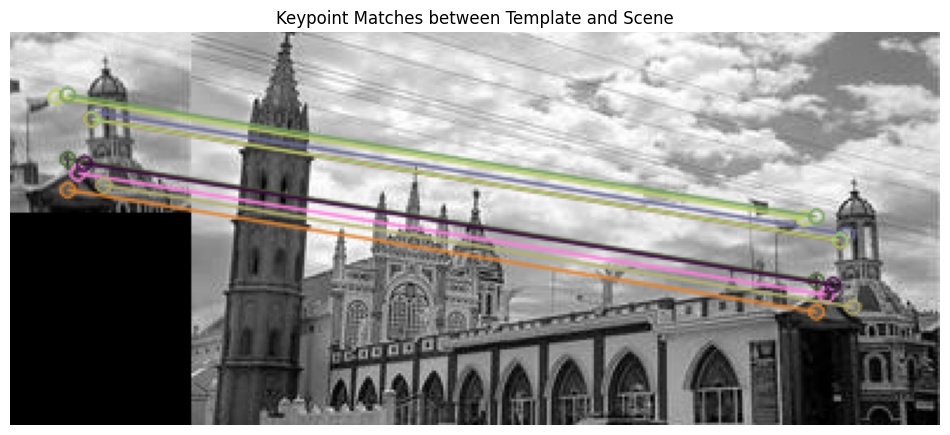

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

template = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
scene = cv2.imread('church.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints_template, descriptors_template = sift.detectAndCompute(template, None)
keypoints_scene, descriptors_scene = sift.detectAndCompute(scene, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptors_template, descriptors_scene)

matches = sorted(matches, key = lambda x: x.distance)

result_image = cv2.drawMatches(template, keypoints_template, scene, keypoints_scene, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.imshow(result_image_rgb)
plt.title("Keypoint Matches between Template and Scene")
plt.axis('off') 
plt.show()
